In [16]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [104]:
# data_df = pd.read_excel("Data for graph plotting.xlsx")
fname = "SUMO Run 6"
data_df = pd.read_excel("SUMO Run Data/" + fname + ".xlsx", sheet_name="Melt Curve Raw Data", header=41)

In [18]:
data_df.drop(columns=['Well', 'Target Name'], inplace=True)

In [19]:
data_df_grouped = data_df.groupby(['Well Position', 'Temperature']).size()

In [20]:
temp_df = data_df_grouped.reset_index()
temp_df['Well Position'].nunique()


96

In [21]:
temps_per_wp = {}
for wp in temp_df['Well Position'].unique():
    wp_df = temp_df[temp_df['Well Position'] == wp]
    # print(wp_df.head())
    temps_per_wp[wp] = set(wp_df['Temperature'].values)


In [22]:
len(temps_per_wp['H9']), len(temps_per_wp['G9']), len(temps_per_wp['G9'] - temps_per_wp['H9'])

(1603, 1603, 0)

In [23]:
data_df['Well Position'].unique()

array(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10',
       'B11', 'B12', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9',
       'C10', 'C11', 'C12', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7',
       'D8', 'D9', 'D10', 'D11', 'D12', 'E1', 'E2', 'E3', 'E4', 'E5',
       'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F1', 'F2', 'F3',
       'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G1',
       'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11',
       'G12', 'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10',
       'H11', 'H12'], dtype=object)

In [24]:
wp_dict = {}
groups = ['ABCD', 'EFGH']

grp_idx = 1

for g in groups:
    
    for r in range(12):
        for c in g:
            cell = c + str(r+1)
            wp_dict[cell] = 'G' + str(grp_idx)
        
        grp_idx += 1
    
# wp_dict

In [25]:
updated_data_df = data_df
updated_data_df['Group'] = updated_data_df['Well Position'].map(wp_dict)

In [26]:
updated_data_df.head()

,Well Position,Reading,Temperature,Fluorescence,Derivative,Group
0,A1,1,24.743299,7073.988770,1359.133179,G1
1,A1,2,24.789637,6836.081055,1091.416626,G1
2,A1,3,24.835976,6469.741699,815.952881,G1
3,A1,4,24.882313,6938.833008,621.989929,G1
4,A1,5,24.928652,6450.096191,583.641541,G1


In [ ]:
temp = {'a': 2}

temp.update({'b': 3})

temp['a'] = 5
temp

In [28]:
pd.DataFrame([[1, 2], [3, 4, 5]])

,0,1,2
0,1,2,NaN
1,3,4,5.0


In [55]:
from collections import defaultdict
new_format_dict = defaultdict(list)

In [56]:
for idx, row in updated_data_df.iterrows():
    # print (idx, row)
    
    group = row['Group']
    reading = row['Reading']
    key = group + '_R' + str(reading)
    
    temp_list = [row['Well Position'], row['Temperature'], row['Fluorescence'], row['Derivative']]

    new_format_dict[key] += temp_list
    # print (new_format_dict)
    # break

In [57]:
len(new_format_dict)

38472

In [58]:
new_format_dict["G1_R1"]

['A1',
 24.74329948425293,
 7073.98876953125,
 1359.1331787109375,
 'B1',
 24.74329948425293,
 4381.4755859375,
 -956.6300659179688,
 'C1',
 24.74329948425293,
 8491.92578125,
 -497.9682312011719,
 'D1',
 24.74329948425293,
 6451.5986328125,
 965.9170532226562]

In [71]:
for k, v in new_format_dict.items():
    # print (k, v)
    
    assert (v[1] == v[5] == v[9] == v[13]), "Error: %s, %s"" %(k, v)"
    
    assert len(v) == 16, "Error: Len %s different from 16"  %(len(v))


In [86]:
cols = ['Well Position1', "Temperature1", "Fluorescence1", "Derivative1",
        'Well Position2', "Temperature2", "Fluorescence2", "Derivative2",
        'Well Position3', "Temperature3", "Fluorescence3", "Derivative3",
        'Well Position4', "Temperature4", "Fluorescence4", "Derivative4",
       ]

new_df = pd.DataFrame.from_dict(new_format_dict, orient='index', columns=cols)
new_df = new_df.reset_index()

new_df.head()

,index,Well Position1,Temperature1,Fluorescence1,Derivative1,Well Position2,Temperature2,Fluorescence2,Derivative2,Well Position3,Temperature3,Fluorescence3,Derivative3,Well Position4,Temperature4,Fluorescence4,Derivative4
0,G1_R1,A1,24.743299,7073.988770,1359.133179,B1,24.743299,4381.475586,-956.630066,C1,24.743299,8491.925781,-497.968231,D1,24.743299,6451.598633,965.917053
1,G1_R2,A1,24.789637,6836.081055,1091.416626,B1,24.789637,4495.292969,-930.808472,C1,24.789637,8942.748047,-288.681549,D1,24.789637,6505.272461,965.616211
2,G1_R3,A1,24.835976,6469.741699,815.952881,B1,24.835976,4417.581543,-559.081116,C1,24.835976,8500.568359,210.349945,D1,24.835976,6452.874023,833.606750
3,G1_R4,A1,24.882313,6938.833008,621.989929,B1,24.882313,4374.158691,129.567383,C1,24.882313,8323.944336,906.842834,D1,24.882313,6634.648926,478.232574
4,G1_R5,A1,24.928652,6450.096191,583.641541,B1,24.928652,4858.253418,933.163818,C1,24.928652,8462.593750,1594.911255,D1,24.928652,6676.791016,-164.211395


In [87]:
new_df['Group'], new_df['Reading'] = new_df['index'].str.split('_R').str

new_df.drop(columns=['index'], inplace=True)

new_df.head()

,Well Position1,Temperature1,Fluorescence1,Derivative1,Well Position2,Temperature2,Fluorescence2,Derivative2,Well Position3,Temperature3,Fluorescence3,Derivative3,Well Position4,Temperature4,Fluorescence4,Derivative4,Group,Reading
0,A1,24.743299,7073.988770,1359.133179,B1,24.743299,4381.475586,-956.630066,C1,24.743299,8491.925781,-497.968231,D1,24.743299,6451.598633,965.917053,G1,1
1,A1,24.789637,6836.081055,1091.416626,B1,24.789637,4495.292969,-930.808472,C1,24.789637,8942.748047,-288.681549,D1,24.789637,6505.272461,965.616211,G1,2
2,A1,24.835976,6469.741699,815.952881,B1,24.835976,4417.581543,-559.081116,C1,24.835976,8500.568359,210.349945,D1,24.835976,6452.874023,833.606750,G1,3
3,A1,24.882313,6938.833008,621.989929,B1,24.882313,4374.158691,129.567383,C1,24.882313,8323.944336,906.842834,D1,24.882313,6634.648926,478.232574,G1,4
4,A1,24.928652,6450.096191,583.641541,B1,24.928652,4858.253418,933.163818,C1,24.928652,8462.593750,1594.911255,D1,24.928652,6676.791016,-164.211395,G1,5


In [88]:
new_df['Temperature'] =  new_df['Temperature1']
new_df['Fluorescence'] = new_df['Fluorescence1'] + new_df['Fluorescence2'] + new_df['Fluorescence3'] + new_df['Fluorescence4']
new_df['Derivative'] = new_df['Derivative1'] + new_df['Derivative2'] + new_df['Derivative3'] + new_df['Derivative4']

new_df.head()

,Well Position1,Temperature1,Fluorescence1,Derivative1,Well Position2,Temperature2,Fluorescence2,Derivative2,Well Position3,Temperature3,...,Derivative3,Well Position4,Temperature4,Fluorescence4,Derivative4,Group,Reading,Temperature,Fluorescence,Derivative
0,A1,24.743299,7073.988770,1359.133179,B1,24.743299,4381.475586,-956.630066,C1,24.743299,...,-497.968231,D1,24.743299,6451.598633,965.917053,G1,1,24.743299,26398.988770,870.451935
1,A1,24.789637,6836.081055,1091.416626,B1,24.789637,4495.292969,-930.808472,C1,24.789637,...,-288.681549,D1,24.789637,6505.272461,965.616211,G1,2,24.789637,26779.394531,837.542816
2,A1,24.835976,6469.741699,815.952881,B1,24.835976,4417.581543,-559.081116,C1,24.835976,...,210.349945,D1,24.835976,6452.874023,833.606750,G1,3,24.835976,25840.765625,1300.828461
3,A1,24.882313,6938.833008,621.989929,B1,24.882313,4374.158691,129.567383,C1,24.882313,...,906.842834,D1,24.882313,6634.648926,478.232574,G1,4,24.882313,26271.584961,2136.632721
4,A1,24.928652,6450.096191,583.641541,B1,24.928652,4858.253418,933.163818,C1,24.928652,...,1594.911255,D1,24.928652,6676.791016,-164.211395,G1,5,24.928652,26447.734375,2947.505219


In [101]:
import xlsxwriter
# new_df.to_excel('SUMO Run Data/SUMO Run6 Formatted.xlsx', engine='xlsxwriter', index='False', float_format="%.4f")

dfs = {'Complete Details': new_df}
writer = pd.ExcelWriter('SUMO Run Data/SUMO Run6 Formatted.xlsx', engine='xlsxwriter')

for sheetname, df in dfs.items():  # loop through `dict` of dataframes
    df.to_excel(writer, sheet_name=sheetname)  # send df to writer
    worksheet = writer.sheets[sheetname]  # pull worksheet object
    for idx, col in enumerate(df):  # loop through all columns
        series = df[col]
        max_len = max((
            series.astype(str).map(len).max(),  # len of largest item
            len(str(series.name))  # len of column name/header
            )) + 1  # adding a little extra space
        worksheet.set_column(idx, idx, max_len)  # set column width
writer.save()

In [102]:
pd.__version__

'0.23.4'

In [103]:
!pwd

/Users/iOP/AI/pdb-secondary-structure


In [89]:
group1 = new_df[new_df['Group'] == 'G1']
group1.head()

,Well Position1,Temperature1,Fluorescence1,Derivative1,Well Position2,Temperature2,Fluorescence2,Derivative2,Well Position3,Temperature3,...,Derivative3,Well Position4,Temperature4,Fluorescence4,Derivative4,Group,Reading,Temperature,Fluorescence,Derivative
0,A1,24.743299,7073.988770,1359.133179,B1,24.743299,4381.475586,-956.630066,C1,24.743299,...,-497.968231,D1,24.743299,6451.598633,965.917053,G1,1,24.743299,26398.988770,870.451935
1,A1,24.789637,6836.081055,1091.416626,B1,24.789637,4495.292969,-930.808472,C1,24.789637,...,-288.681549,D1,24.789637,6505.272461,965.616211,G1,2,24.789637,26779.394531,837.542816
2,A1,24.835976,6469.741699,815.952881,B1,24.835976,4417.581543,-559.081116,C1,24.835976,...,210.349945,D1,24.835976,6452.874023,833.606750,G1,3,24.835976,25840.765625,1300.828461
3,A1,24.882313,6938.833008,621.989929,B1,24.882313,4374.158691,129.567383,C1,24.882313,...,906.842834,D1,24.882313,6634.648926,478.232574,G1,4,24.882313,26271.584961,2136.632721
4,A1,24.928652,6450.096191,583.641541,B1,24.928652,4858.253418,933.163818,C1,24.928652,...,1594.911255,D1,24.928652,6676.791016,-164.211395,G1,5,24.928652,26447.734375,2947.505219


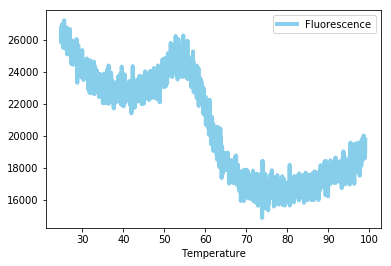

In [90]:
# multiple line plot
plt.plot( 'Temperature', 'Fluorescence', data=group1, marker='', color='skyblue', linewidth=4)
# plt.plot( 'Temperature ', 'Derivative', data=group1, marker='', color='olive', linewidth=2)
plt.xlabel('Temperature')
plt.legend()

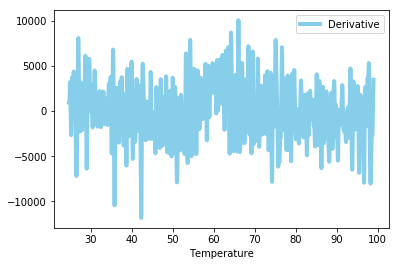

In [91]:
# multiple line plot
plt.plot( 'Temperature', 'Derivative', data=group1, marker='', color='skyblue', linewidth=4)
# plt.plot( 'Temperature ', 'Derivative', data=group1, marker='', color='olive', linewidth=2)
plt.xlabel('Temperature')
plt.legend()

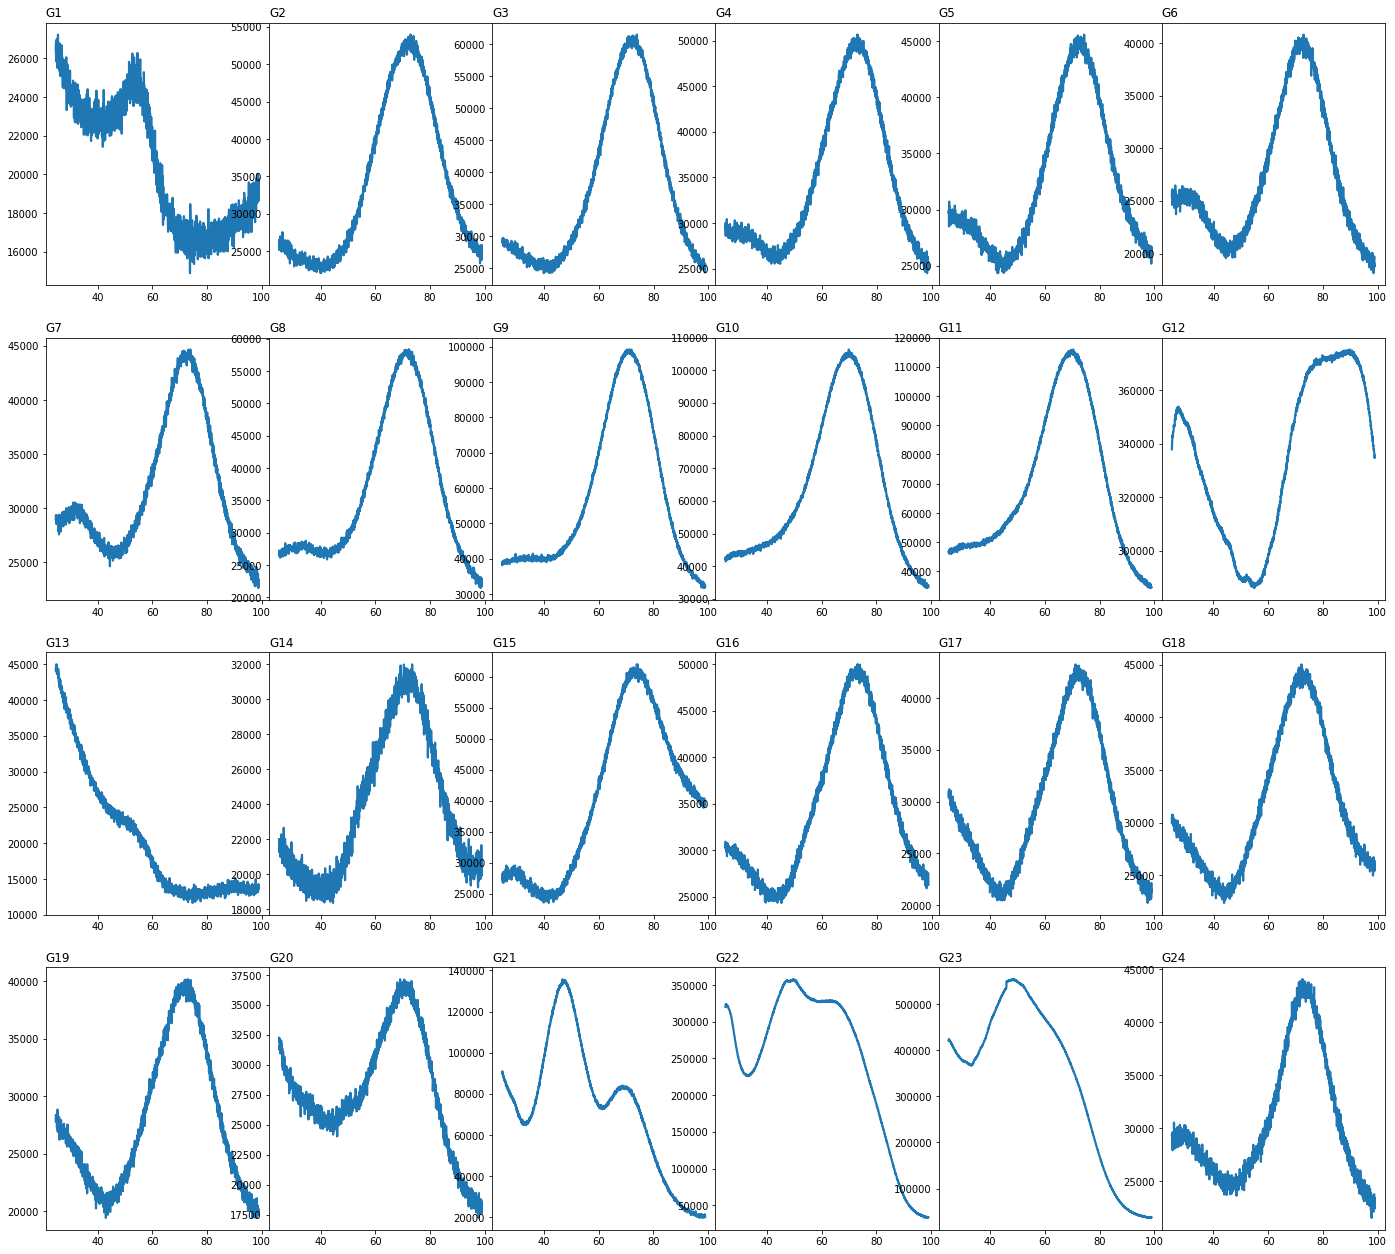

In [92]:
plt.figure(figsize = (24,28))
num_cols_in_subplot = 6
num_groups = 24

# group_names = wp_dict.values()
for i in range(num_groups):
    group_name = 'G' + str(i+1)
    
    plt.subplot(num_groups//num_cols_in_subplot+1, num_cols_in_subplot, i+1)
    # subset the data to just a specific region 
    df_region = new_df[new_df["Group"] == group_name]
    plt.plot(df_region["Temperature"], df_region["Fluorescence"], linewidth = 2.2, 
             label = group_name)
    
    plt.title(group_name, loc = "left")
    plt.subplots_adjust(wspace=0, hspace=.2)
    # plt.legend()

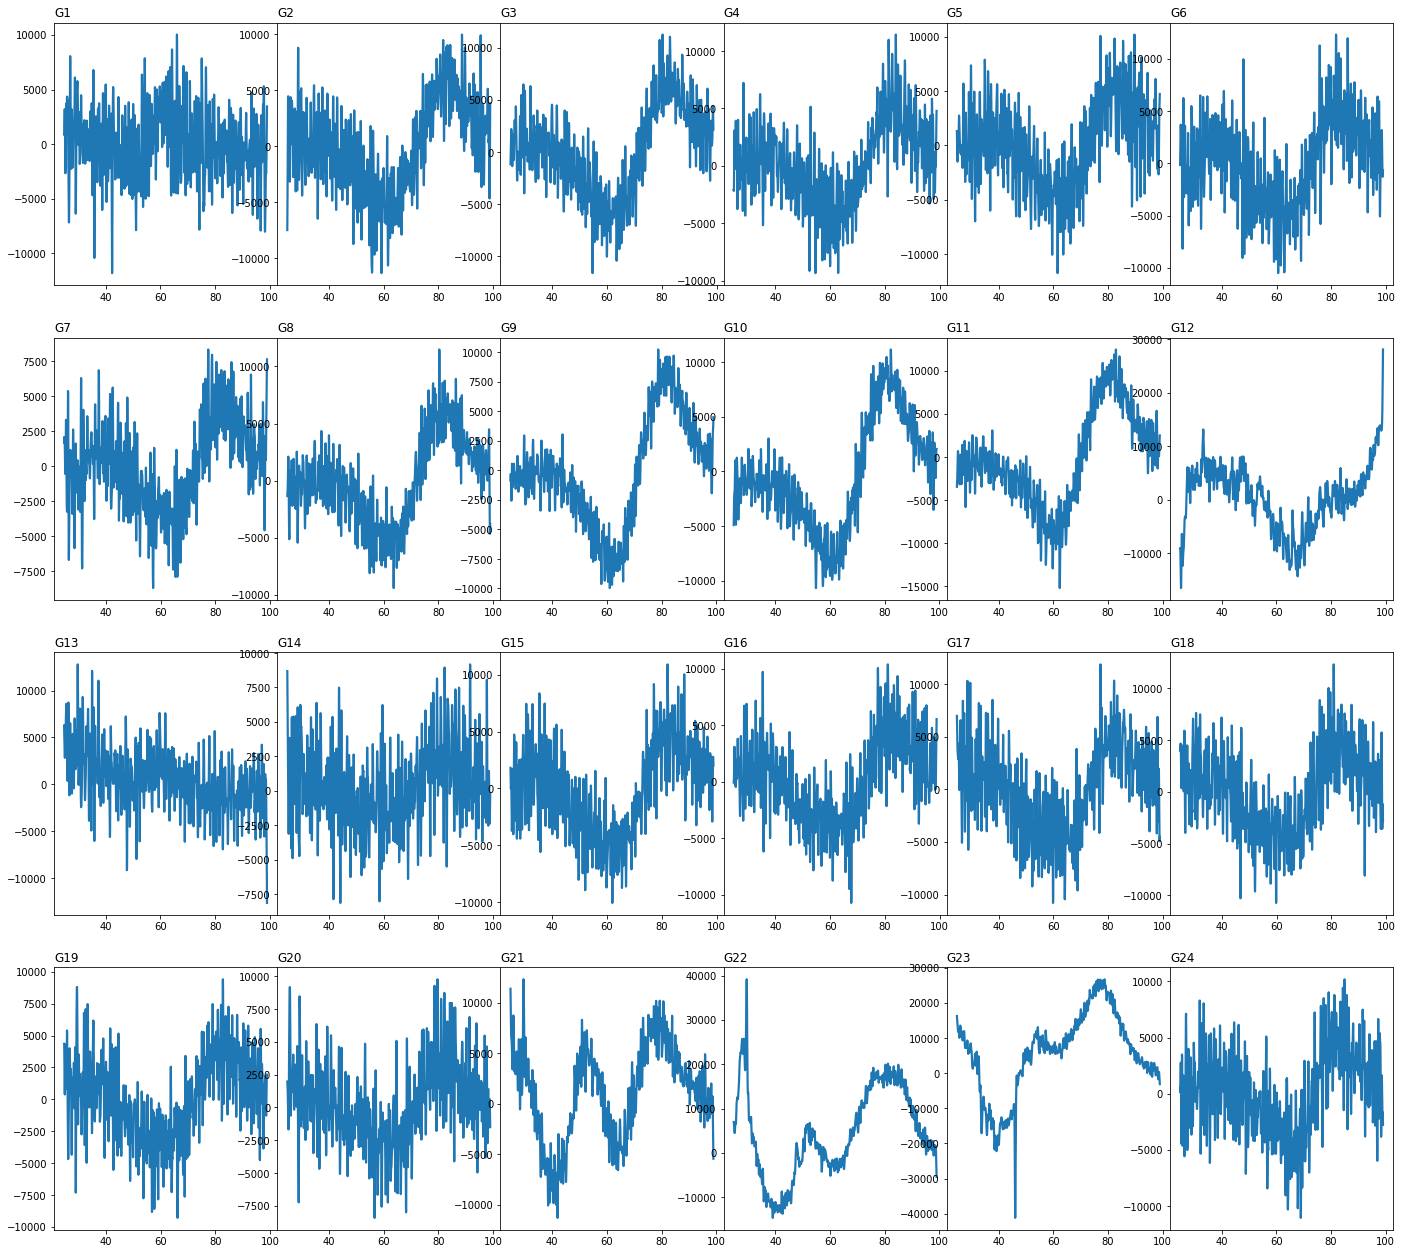

In [93]:
plt.figure(figsize = (24,28))
num_cols_in_subplot = 6
num_groups = 24

# group_names = wp_dict.values()
for i in range(num_groups):
    group_name = 'G' + str(i+1)
    
    plt.subplot(num_groups//num_cols_in_subplot+1, num_cols_in_subplot, i+1)
    # subset the data to just a specific region 
    df_region = new_df[new_df["Group"] == group_name]
    plt.plot(df_region["Temperature"], df_region["Derivative"], linewidth = 2.2, 
             label = group_name)
    
    plt.title(group_name, loc = "left")
    plt.subplots_adjust(wspace=0, hspace=.2)

In [ ]:
fig = plt.figure()

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

ax.set_xlabel('Volume (mL)')
ax.set_ylabel('Absorbance (mAU)')

plt.plot( 'X1', 'Y1', data=data_df, marker='', color='skyblue', linewidth=4)
plt.plot( 'X2 ', 'Y2', data=data_df, marker='', color='olive', linewidth=2)

plt.legend(('Previous Prep', 'Recent Prep'), loc = 'upper right')

plt.show()

In [ ]:
data_df = pd.read_excel("Data for graph plotting.xlsx", sheet_name=1)

fig = plt.figure()

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

ax.set_xlabel('Volume (mL)')
ax.set_ylabel('Absorbance (mAU)')

plt.plot( 'X1', 'Y1', data=data_df, marker='', color='skyblue', linewidth=4)
plt.plot( 'X2', 'Y2', data=data_df, marker='', color='olive', linewidth=2)

plt.legend(('Previous Prep', 'Recent Prep'), loc = 'upper right')

plt.show()

In [ ]:
# data_df.plot(x="X2 ", y=["Y1", "Y2"], kind="bar")
data_df.plot(x="X2 ", y=["Y1", "Y2"])

In [ ]:
data_df = pd.read_excel("Data for graph plotting.xlsx", sheet_name=1)
data_df.plot(x="X2", y=["Y1", "Y2"])

In [ ]:
sns.lmplot('X2 ', 'Y1', data=data_df, fit_reg=False)

In [ ]:
data_df.columns

In [ ]:
sns.lmplot('X2 ', 'Y2', data=data_df, fit_reg=False)

In [ ]:
fig, ax = plt.subplots()

sns.lmplot('X2 ', 'Y1', data=data_df, fit_reg=False, ax=ax)
sns.lmplot('X2 ', 'Y2', data=data_df, fit_reg=False, ax=ax)
